### Day6 work
- 회귀 실습: 자전거 대여 수요 예측
    - learning method: supervised learning, regression
    - learning algorithm: linear regression, ridge, lasso, random forest regressor, gradient boosting regressor
    - 
    - feature: undetermined
    - label: undetermind
    - scaling: none
    - encoding: true, log transform

- 데이터 클렌징 및 가공과 데이터 시각화

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

In [2]:
file_path = '../data/bike_train.csv'
bike_df = pd.read_csv(file_path)

print(bike_df.shape)
bike_df.head()

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [4]:
# 문자열을 datetime으로 변환
bike_df['datetime'] = bike_df.datetime.apply(pd.to_datetime)

# datetime 타입에서 년, 월, 일, 시간 추출
bike_df['year'] = bike_df.datetime.apply(lambda x: x.year)
bike_df['month'] = bike_df.datetime.apply(lambda x: x.month)
bike_df['day'] = bike_df.datetime.apply(lambda x: x.day)
bike_df['hour'] = bike_df.datetime.apply(lambda x: x.hour)
bike_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4


In [5]:
drop_columns = ['datetime', 'casual', 'registered']
bike_df = bike_df.drop(drop_columns, axis=1)

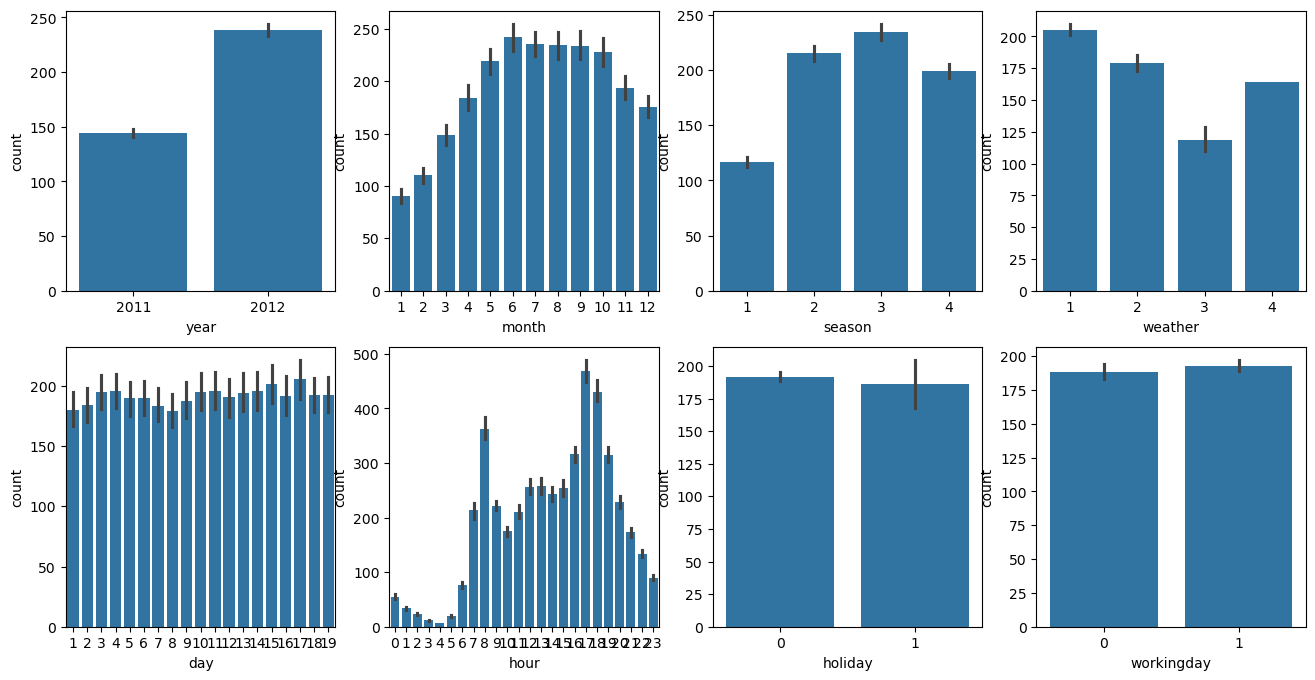

In [6]:
fig, axs = plt.subplots(figsize=(16, 8), ncols=4, nrows=2)
cat_feature = ['year', 'month', 'season', 'weather', 'day', 'hour', 'holiday', 'workingday']

# cat_feature에 있는 모든 칼럼별로 개별 칼럼값에 따른 count의 합을 barplot으로 시각화
for i, feature in enumerate(cat_feature):
    row = int(i/4)
    col = i%4
    # 시본의 barplot을 이용해 칼럼값에 따른 count의 합을 표현
    sns.barplot(x=feature, y='count', data=bike_df, ax=axs[row][col])

In [7]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [8]:
# log 값 변환 시 NaN 등의 이슈로 log()가 아닌 log1p()를 이용해 RMSLE 계산
def rmsle(y, pred):
    log_y = np.log1p(y)
    log_pred = np.log1p(pred)
    squared_error = (log_y - log_pred) ** 2
    rmsle = np.sqrt(np.mean(squared_error))
    return rmsle

In [9]:
# 사이킷언의 mean_square_error()를 이용해 RMSE 계산
def rmse(y, pred):
    return np.sqrt(mean_squared_error(y, pred))

In [10]:
# MAE, RMSE, RMSLE를 모두 계산
def evaluate_regr(y, pred):
    rmsle_val = rmsle(y, pred)
    rmse_val = rmse(y, pred)
    mae_val = mean_absolute_error(y, pred)
    print(f"RMSLE: {rmsle_val:.3f}, RMSE: {rmse_val:.3f}, MAE: {mae_val:.3f}")

- 로그 변환, 피쳐 인코딩과 모델 학습/예측/평가

In [11]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [12]:
y_target = bike_df['count']
X_features = bike_df.drop(['count'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=0)

print(f"X train: {X_train.shape}, {X_train.ndim}D")
print(f"y train: {y_train.shape}, {y_train.ndim}D")
print(f"X test: {X_test.shape}, {X_test.ndim}D")
print(f"y test: {y_test.shape}, {y_test.ndim}D")
print(f"train & test ratio: {len(X_train)/len(X_features)*100:.2f} %., {len(X_test)/len(X_features)*100:.2f} %")

X train: (8708, 12), 2D
y train: (8708,), 1D
X test: (2178, 12), 2D
y test: (2178,), 1D
train & test ratio: 79.99 %., 20.01 %


In [13]:
# model instance
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)

LinearRegression()

In [14]:
pred = lr_reg.predict(X_test)
evaluate_regr(y_test, pred)

RMSLE: 1.191, RMSE: 141.973, MAE: 106.387


In [15]:
def get_top_error_date(y_test, pred, n_tops = 5):
    # DataFrame의 칼럼으로 실제 대여 횟수(count)와 예측값을 서로 비교할 수 있도록 생성
    result_df = pd.DataFrame(y_test.values, columns=['real_count'])
    result_df['predicted_count'] = np.round(pred)
    result_df['diff'] = np.abs(result_df['real_count'] - result_df['predicted_count'])
    
    # 예측값와 실제 값이 가장 큰 데이터 순으로 출력
    print(result_df.sort_values('diff', ascending=False)[:n_tops])

In [16]:
get_top_error_date(y_test, pred, n_tops=5)

      real_count  predicted_count   diff
1618         890            321.0  569.0
966          884            325.0  559.0
412          745            193.0  552.0
454          721            177.0  544.0
1003         713            171.0  542.0


<Axes: >

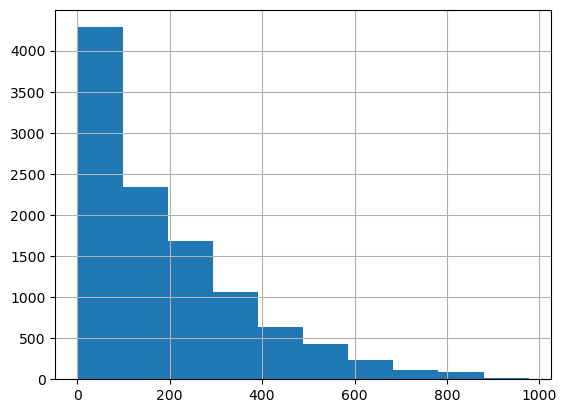

In [17]:
y_target.hist()

<Axes: >

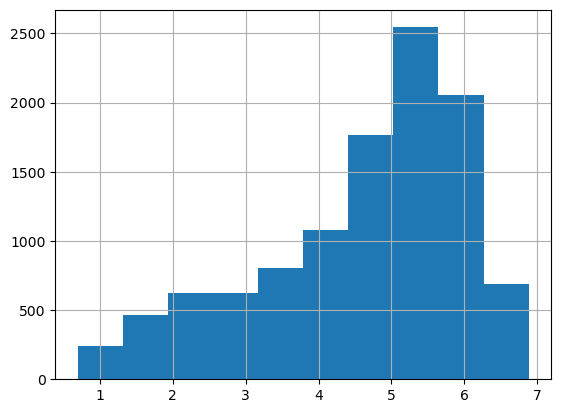

In [18]:
y_log_transform = np.log1p(y_target)
y_log_transform.hist()

In [19]:
# 타깃 칼럼인 count 값을 log1p로 로그 변화
y_target_log = np.log1p(y_target)

# 로그 변환된 y_target_log를 반영해 학습/테스트 데이터 세트 분할
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target_log, test_size=0.3, random_state=0)

In [20]:
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)

LinearRegression()

In [21]:
pred = lr_reg.predict(X_test)
y_test_exp = np.expm1(y_test)

In [22]:
pred_exp = np.expm1(pred)

evaluate_regr(y_test_exp, pred_exp)

RMSLE: 1.017, RMSE: 162.594, MAE: 109.286


<Axes: ylabel='None'>

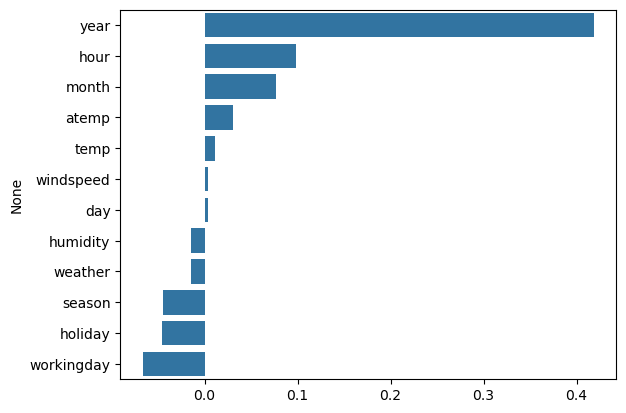

In [23]:
coef = pd.Series(lr_reg.coef_, index=X_features.columns)
coef_sort = coef.sort_values(ascending=False)
sns.barplot(x=coef_sort.values, y=coef_sort.index)

In [24]:
# 'year', 'month', 'day', 'hour' 등의 feature들을 One Hot Encoding
X_features_ohe = pd.get_dummies(X_features, columns=['year', 'month', 'day', 'hour', 'holiday', 'workingday', 'season', 'weather'])

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_features_ohe, y_target_log, test_size=0.3, random_state=0)

In [26]:
def get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1=False):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    if is_expm1:
        y_test = np.expm1(y_test)
        pred = np.expm1(pred)
    print('###', model.__class__.__name__, '###')
    evaluate_regr(y_test, pred)

In [27]:
# 모델별로 평가 수행
lr_reg = LinearRegression()
ridge_reg = Ridge(alpha=10)
lasso_reg = Lasso(alpha=0.1)

for model in [lr_reg, ridge_reg, lasso_reg]:
    get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1=True)

### LinearRegression ###
RMSLE: 0.590, RMSE: 97.688, MAE: 63.382
### Ridge ###
RMSLE: 0.590, RMSE: 98.529, MAE: 63.893
### Lasso ###
RMSLE: 1.227, RMSE: 174.258, MAE: 119.504


<Axes: ylabel='None'>

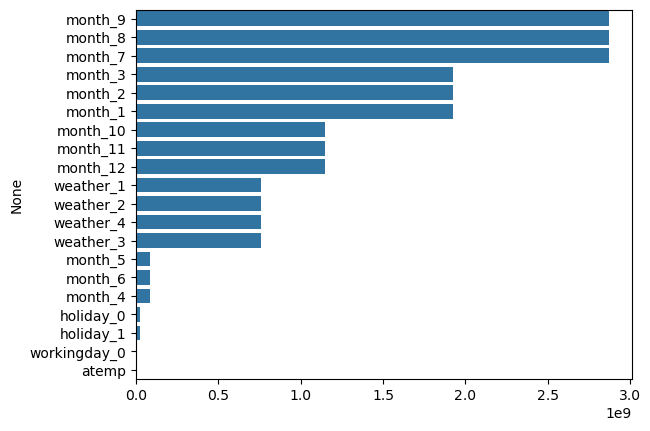

In [28]:
coef = pd.Series(lr_reg.coef_, index=X_features_ohe.columns)
coef_sort = coef.sort_values(ascending=False)[:20]
sns.barplot(x=coef_sort.values, y=coef_sort.index)

### 회귀 실습 - 캐글 주택 가격: 고급 회귀 기법

- 데이터 사전 처리(Preprocessing)

In [37]:
file_path = '../data/house_price.csv'
house_df_org = pd.read_csv(file_path)
house_df = house_df_org.copy()
house_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [31]:
print(f"데이터 세트의 Shape: {house_df.shape}")
print(f"\n전체 feature의 type\n{house_df.dtypes.value_counts()}")
isnull_series = house_df.isnull().sum()
print(f"\nNull 칼럼과 그 건수:\n{isnull_series[isnull_series > 0].sort_values(ascending=False)}")

데이터 세트의 Shape: (1460, 81)

전체 feature의 type
object     43
int64      35
float64     3
Name: count, dtype: int64

Null 칼럼과 그 건수:
PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
Electrical         1
dtype: int64


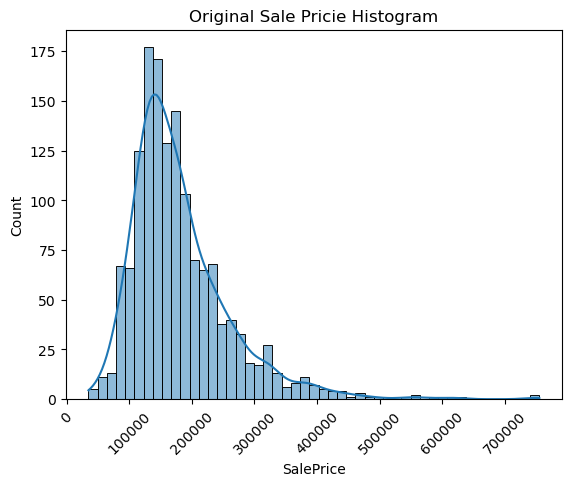

In [32]:
plt.title('Original Sale Pricie Histogram')
plt.xticks(rotation=45)
sns.histplot(house_df['SalePrice'], kde=True)
plt.show()

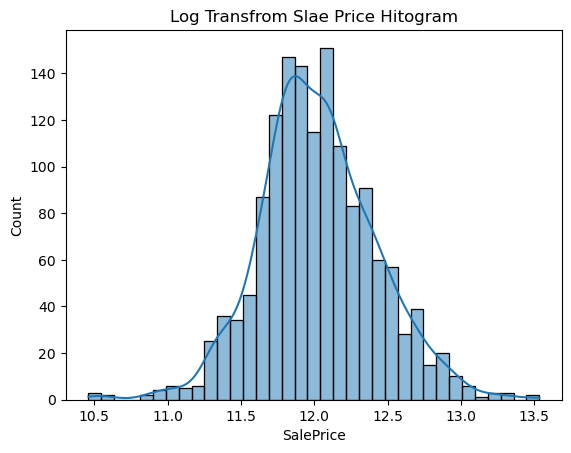

In [33]:
plt.title('Log Transfrom Slae Price Hitogram')
log_SalePrice = np.log1p(house_df['SalePrice'])
sns.histplot(log_SalePrice, kde=True)
plt.show()

In [38]:
# SalePrice log transform
original_SalePrice = house_df['SalePrice']
house_df['SalePrice'] = np.log1p(house_df['SalePrice'])

house_df = house_df.drop(['Id', 'PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'], axis=1)
house_df = house_df.fillna(house_df.mean(numeric_only=True))

null_coulmn_count = house_df.isnull().sum()[house_df.isnull().sum() > 0]
print('## Null feature type:', house_df.dtypes[null_coulmn_count.index], sep='\n')

## Null feature type:
MasVnrType      object
BsmtQual        object
BsmtCond        object
BsmtExposure    object
BsmtFinType1    object
BsmtFinType2    object
Electrical      object
GarageType      object
GarageFinish    object
GarageQual      object
GarageCond      object
dtype: object


In [39]:
print(f"before get_dummies() data shape: {house_df.shape}")
house_df_ohe = pd.get_dummies(house_df)
print(f"after get_dummise() data shape: {house_df_ohe.shape}")

null_coulmn_count = house_df_ohe.isnull().sum()[house_df_ohe.isnull().sum() > 0]
print('## Null feature type:', house_df_ohe.dtypes[null_coulmn_count.index],sep='\n')

before get_dummies() data shape: (1460, 75)
after get_dummise() data shape: (1460, 270)
## Null feature type:
Series([], dtype: object)


- 선형 회귀 모델 학습/예측/평가

In [47]:
def get_rmse(model):
    pred = model.predict(X_test)
    mse = mean_squared_error(y_test, pred)
    rmse = np.sqrt(mse)
    print(model.__class__.__name__, '로그 변환된 RMSE: ', np.round(rmse, 3))
    return rmse

In [48]:
def get_rmses(models):
    rmses = []
    for model in models:
        rmse = get_rmse(model)
        rmses.append(rmse)
    return rmses

In [42]:
y_target = house_df_ohe['SalePrice']
X_features = house_df_ohe.drop(columns=['SalePrice'])
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=156)

In [43]:
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)

LinearRegression()

In [44]:
ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)

Ridge()

In [45]:
lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)

Lasso()

In [49]:
models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

LinearRegression 로그 변환된 RMSE:  0.132
Ridge 로그 변환된 RMSE:  0.127
Lasso 로그 변환된 RMSE:  0.176


[0.13183184688250485, 0.12740582836266195, 0.17628250556471395]

In [50]:
def get_top_bottom_coef(model, n=10):
    coef = pd.Series(model.coef_, index=X_features.columns)
    
    coef_high = coef.sort_values(ascending=False).head(n)
    coef_low = coef.sort_values(ascending=False).tail(n)
    
    return coef_high, coef_low

In [62]:
def visualize_cofficient(models):
    fig, axs = plt.subplots(figsize=(24,10), nrows=1, ncols=3)
    fig.tight_layout()
    
    for i_num , model in enumerate(models):
        coef_high, coef_low = get_top_bottom_coef(model)
        coef_concat = pd.concat([coef_high, coef_low])
        
        axs[i_num].set_title(model.__class__.__name__+'Coefficient', size=25)
        axs[i_num].tick_params(axis='y', direction='in', pad=-120)
        
        for label in (axs[i_num].get_xticklabels()+axs[i_num].get_yticklabels()):
            label.set_fontsize(22)
        
        sns.barplot(x=coef_concat.values, y=coef_concat.index, ax=axs[i_num])

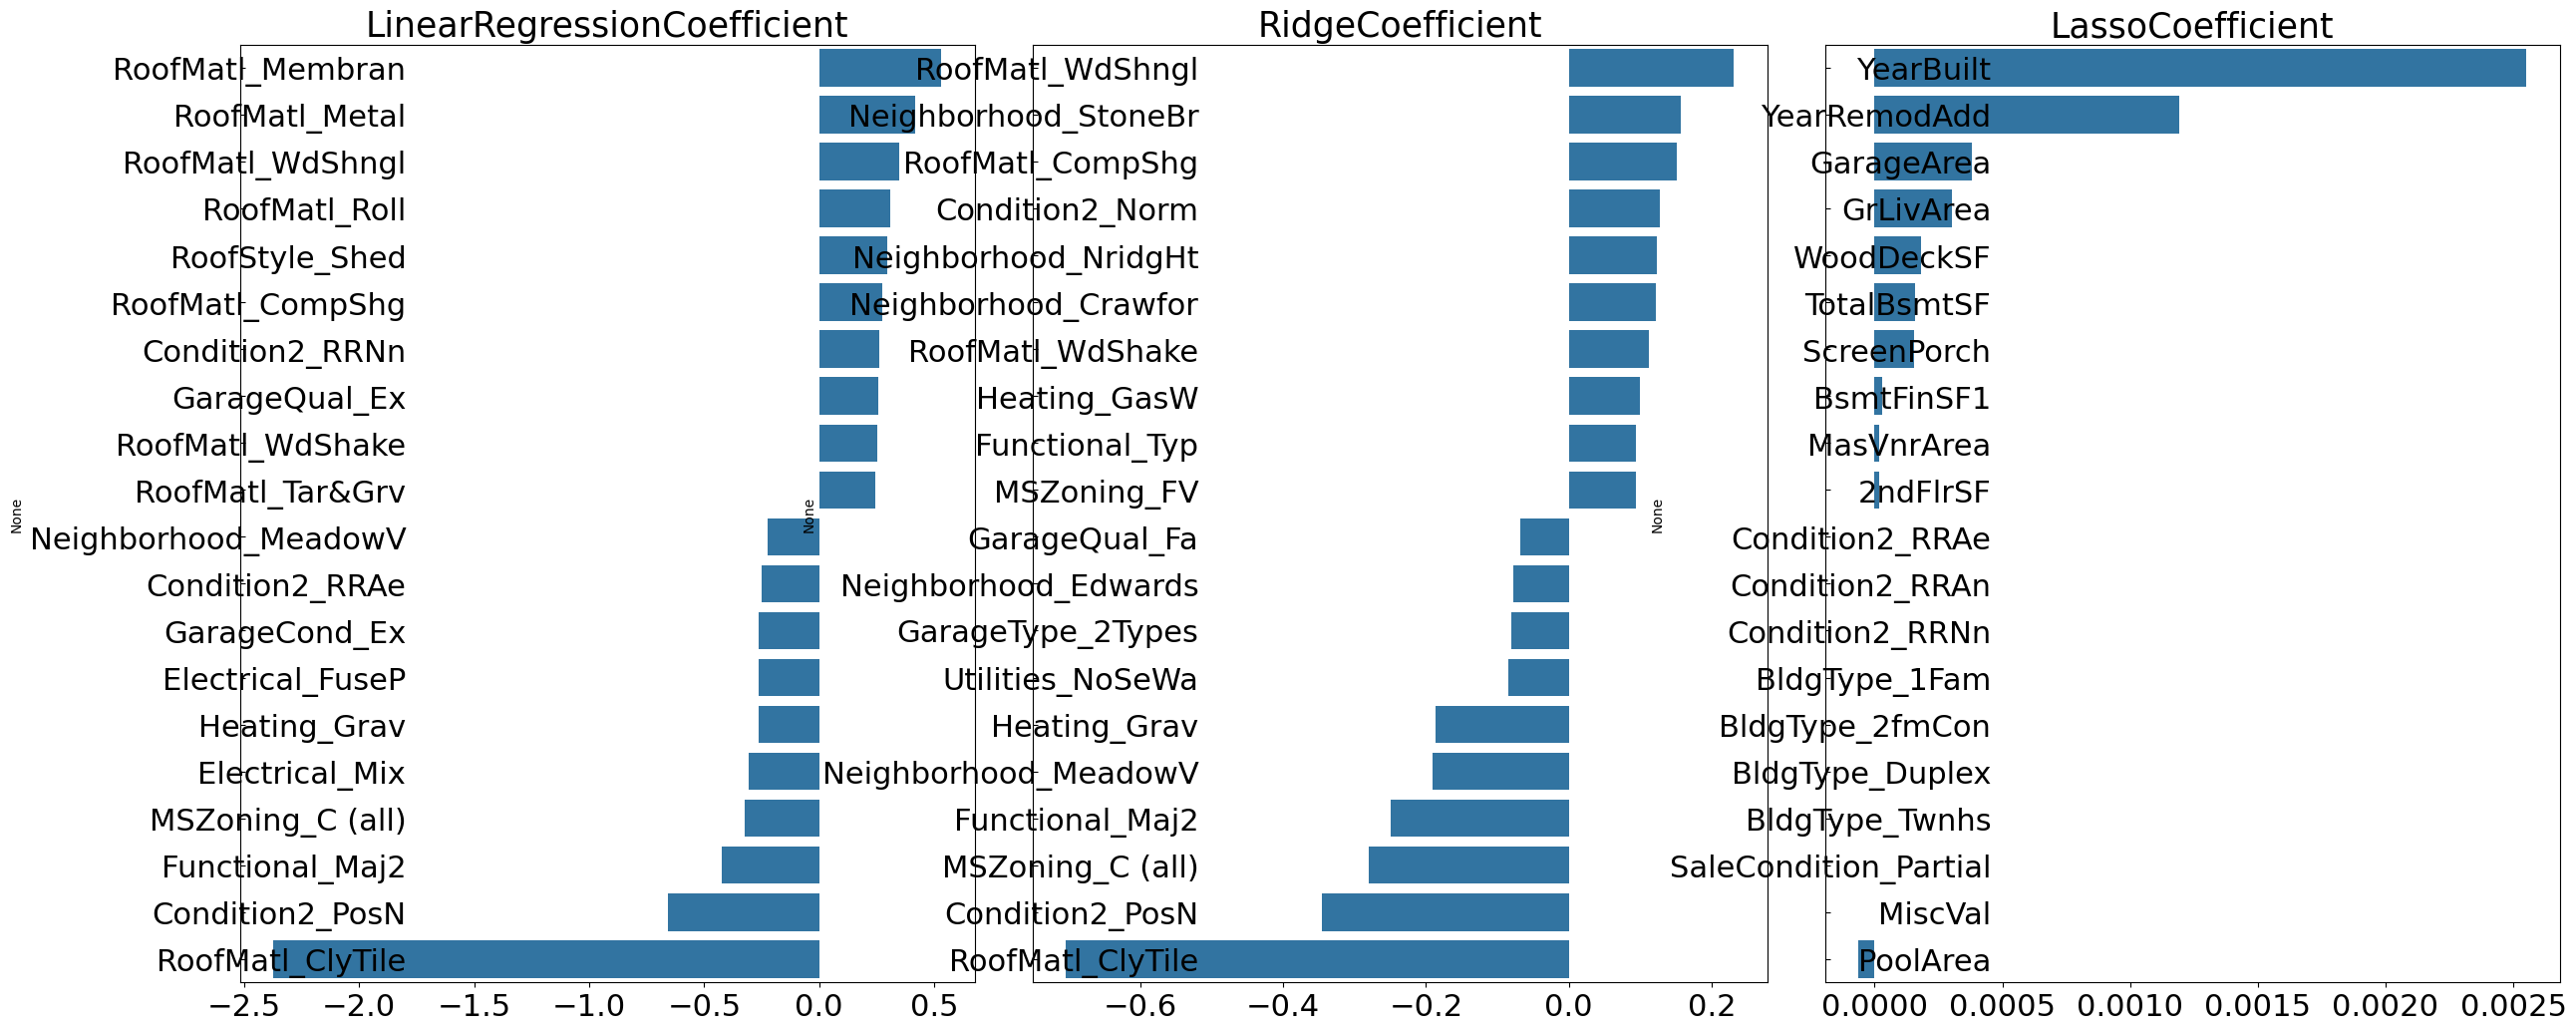

In [63]:
visualize_cofficient(models)

In [64]:
from sklearn.model_selection import cross_val_score

In [65]:
def get_avg_rmse_cv(models):
    for model in models:
        rmse_list = np.sqrt(-cross_val_score(model, X_features, y_target,
                                             scoring="neg_mean_squared_error"))
        rmse_avg = np.mean(rmse_list)
        print(f"\n{model.__class__.__name__} CV RSEM 값 리스트: {np.round(rmse_list, 3)}")
        print(f"{model.__class__.__name__} CV 평균 RMSE 값: {np.round(rmse_avg, 3)}")

In [66]:
get_avg_rmse_cv(models[1:])


Ridge CV RSEM 값 리스트: [0.117 0.154 0.142 0.117 0.189]
Ridge CV 평균 RMSE 값: 0.144

Lasso CV RSEM 값 리스트: [0.161 0.204 0.177 0.181 0.265]
Lasso CV 평균 RMSE 값: 0.198


In [67]:
def print_best_params(model, params):
    grid_model = GridSearchCV(model, param_grid=params,
                              scoring="neg_mean_squared_error")
    grid_model.fit(X_features, y_target)
    rmse = np.sqrt(-1*grid_model.best_score_)
    print(f"{model.__class__.__name__} 5 CV 시 최적의 평균 RMSE 값: {np.round(rmse, 4)}, 최적 alpha: {grid_model.best_params_}")

In [68]:
ridge_params = {'alpha':[0.05, 0.1, 1, 5, 8, 10, 12, 15, 20]}
lasso_params = {'alpha':[0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1, 5, 10]}
print_best_params(ridge_reg, ridge_params)
print_best_params(lasso_reg, lasso_params)

Ridge 5 CV 시 최적의 평균 RMSE 값: 0.1418, 최적 alpha: {'alpha': 12}
Lasso 5 CV 시 최적의 평균 RMSE 값: 0.142, 최적 alpha: {'alpha': 0.001}


In [69]:
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)

LinearRegression()

In [70]:
ridge_reg = Ridge(alpha=12)
ridge_reg.fit(X_train, y_train)

Ridge(alpha=12)

In [71]:
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)

Lasso(alpha=0.001)

LinearRegression 로그 변환된 RMSE:  0.132
Ridge 로그 변환된 RMSE:  0.124
Lasso 로그 변환된 RMSE:  0.12


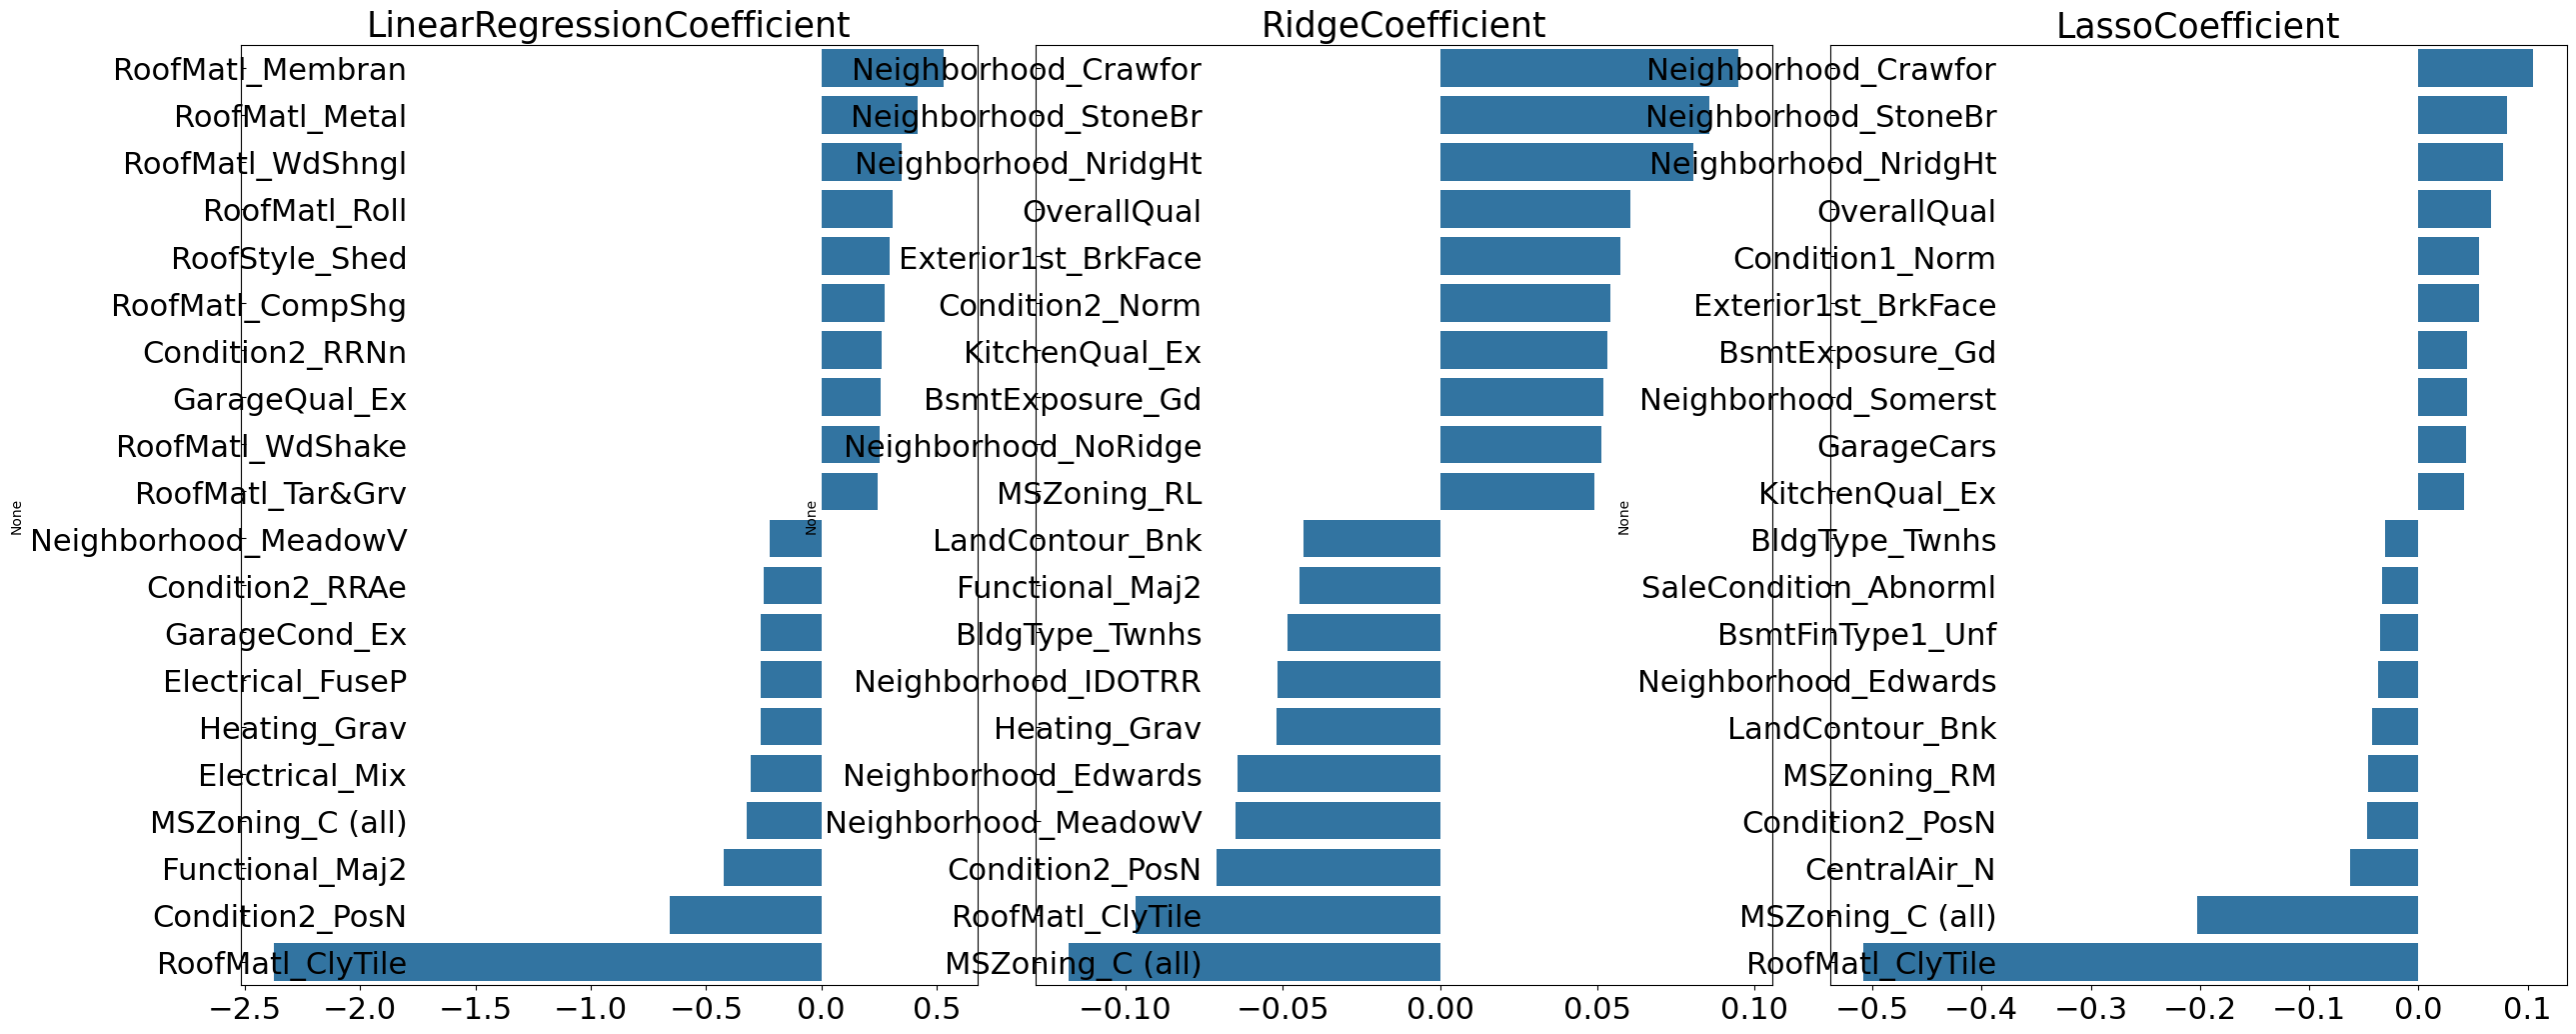

In [72]:
models = [lr_reg, ridge_reg, lasso_reg]

get_rmses(models)
visualize_cofficient(models)

In [73]:
from scipy.stats import skew

In [74]:
features_index = house_df.dtypes[house_df.dtypes != 'object'].index
skew_features = house_df[features_index].apply(lambda x: skew(x))
skew_features_top = skew_features[skew_features > 1]

print(skew_features_top.sort_values(ascending=False))

MiscVal          24.451640
PoolArea         14.813135
LotArea          12.195142
3SsnPorch        10.293752
LowQualFinSF      9.002080
KitchenAbvGr      4.483784
BsmtFinSF2        4.250888
ScreenPorch       4.117977
BsmtHalfBath      4.099186
EnclosedPorch     3.086696
MasVnrArea        2.673661
LotFrontage       2.382499
OpenPorchSF       2.361912
BsmtFinSF1        1.683771
WoodDeckSF        1.539792
TotalBsmtSF       1.522688
MSSubClass        1.406210
1stFlrSF          1.375342
GrLivArea         1.365156
dtype: float64


In [77]:
# 왜곡 정도가 높은 feature를 log 변환후 one-ot-encoding
house_df_ohe = pd.get_dummies(house_df)

y_target = house_df_ohe['SalePrice']
X_features = house_df_ohe.drop(columns=['SalePrice'])

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=156)

In [78]:
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)

LinearRegression()

In [82]:
ridge_reg = Ridge(alpha=12)
ridge_reg.fit(X_train, y_train)

Ridge(alpha=12)

In [83]:
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)

Lasso(alpha=0.001)

In [81]:
ridge_params = {'alpha':[0.05, 0.1, 1, 5, 8, 10, 12, 15, 20]}
lasso_params = {'alpha':[0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1, 5, 10]}
print_best_params(ridge_reg, ridge_params)
print_best_params(lasso_reg, lasso_params)

Ridge 5 CV 시 최적의 평균 RMSE 값: 0.1418, 최적 alpha: {'alpha': 12}
Lasso 5 CV 시 최적의 평균 RMSE 값: 0.142, 최적 alpha: {'alpha': 0.001}


LinearRegression 로그 변환된 RMSE:  0.132
Ridge 로그 변환된 RMSE:  0.124
Lasso 로그 변환된 RMSE:  0.12


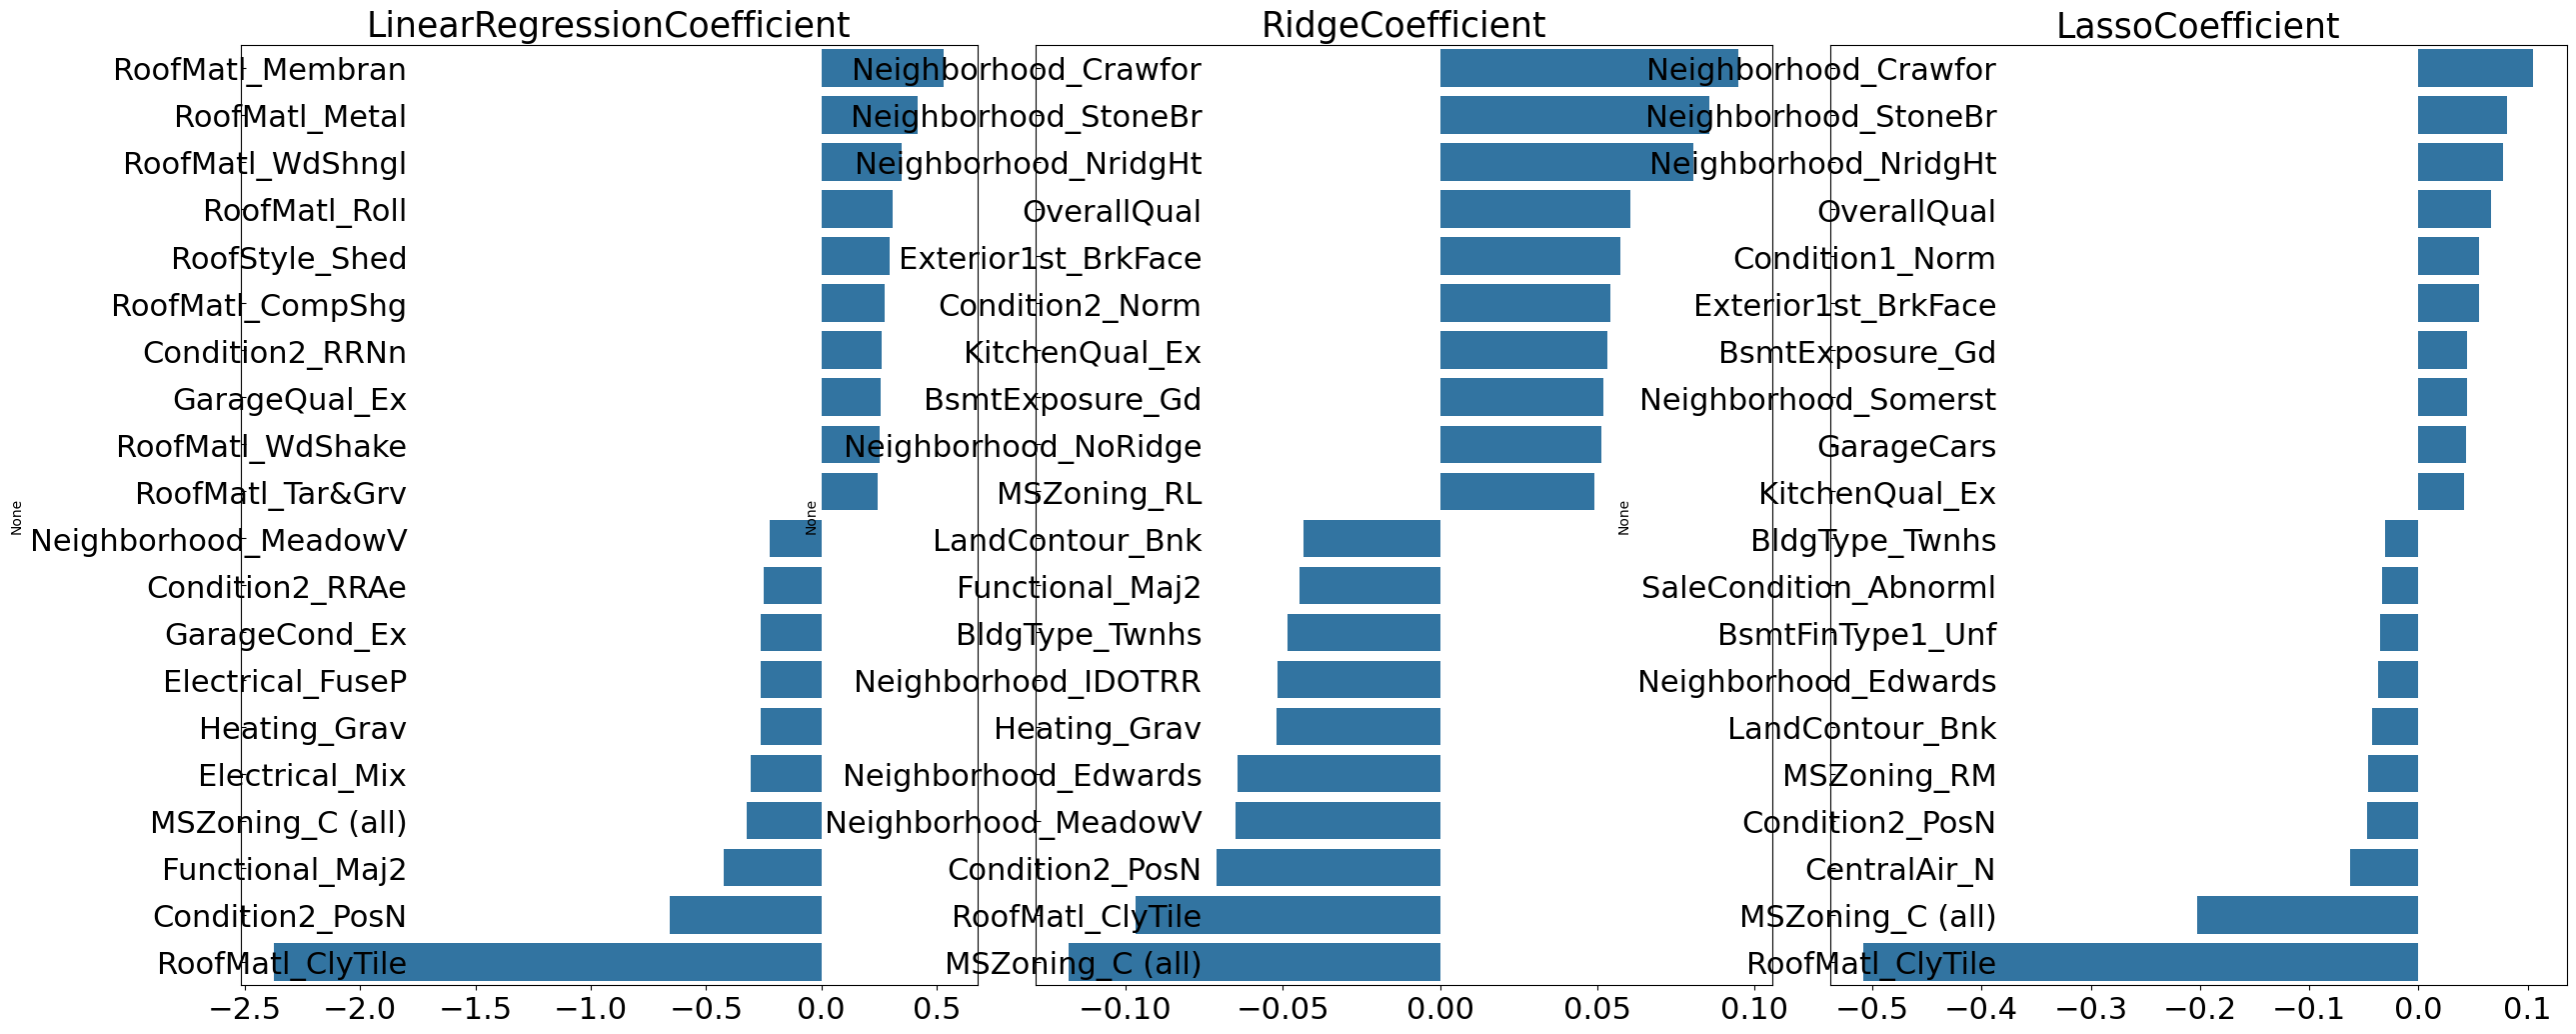

In [84]:
models = [lr_reg, ridge_reg, lasso_reg]

get_rmses(models)
visualize_cofficient(models)

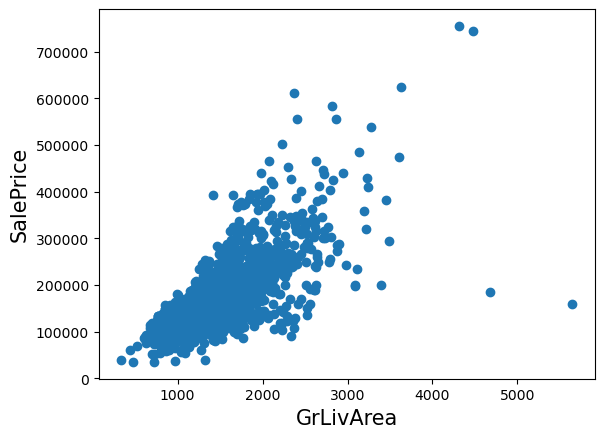

In [85]:
plt.scatter(x=house_df_org['GrLivArea'], y=house_df_org['SalePrice'])
plt.xlabel('GrLivArea', fontsize=15)
plt.ylabel('SalePrice', fontsize=15)
plt.show()

In [87]:
cond1 = house_df_ohe['GrLivArea'] > np.log1p(4000)
cond2 = house_df_ohe['SalePrice'] < np.log1p(500000)
outlier_index = house_df_ohe[cond1 & cond2].index

print(f"이상치 레코드 index: {outlier_index.values}")
print(f"이상치 삭제 전 house_df_ohe shape: {house_df_ohe.shape}")

house_df_ohe = house_df_ohe.drop(outlier_index, axis=0)
print(f"이상치 삭제 후 house_df_ohe shape: {house_df_ohe.shape}")

이상치 레코드 index: [   0    1    2 ... 1457 1458 1459]
이상치 삭제 전 house_df_ohe shape: (1460, 270)
이상치 삭제 후 house_df_ohe shape: (9, 270)


In [88]:
y_target = house_df_ohe['SalePrice']
X_features = house_df_ohe.drop(columns=['SalePrice'])
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=156)



Ridge 5 CV 시 최적의 평균 RMSE 값: 0.276, 최적 alpha: {'alpha': 20}


c:\Users\PC\anaconda3\envs\ml_38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.539e-05, tolerance: 1.078e-05
  model = cd_fast.enet_coordinate_descent(
c:\Users\PC\anaconda3\envs\ml_38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.064e-05, tolerance: 9.235e-06
  model = cd_fast.enet_coordinate_descent(
c:\Users\PC\anaconda3\envs\ml_38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality 

Lasso 5 CV 시 최적의 평균 RMSE 값: 0.0755, 최적 alpha: {'alpha': 10}


c:\Users\PC\anaconda3\envs\ml_38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.310e-05, tolerance: 1.500e-05
  model = cd_fast.enet_coordinate_descent(
c:\Users\PC\anaconda3\envs\ml_38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.594e-04, tolerance: 1.072e-05
  model = cd_fast.enet_coordinate_descent(
c:\Users\PC\anaconda3\envs\ml_38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality 

In [92]:
idge_reg = Ridge(alpha=20)
ridge_reg.fit(X_train, y_train)

Ridge(alpha=12)

In [93]:
lasso_reg = Lasso(alpha=10)
lasso_reg.fit(X_train, y_train)

Lasso(alpha=10)

In [91]:
ridge_params = {'alpha':[0.05, 0.1, 1, 5, 8, 10, 12, 15, 20]}
lasso_params = {'alpha':[0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1, 5, 10]}
print_best_params(ridge_reg, ridge_params)
print_best_params(lasso_reg, lasso_params)

Ridge 5 CV 시 최적의 평균 RMSE 값: 0.276, 최적 alpha: {'alpha': 20}


c:\Users\PC\anaconda3\envs\ml_38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.539e-05, tolerance: 1.078e-05
  model = cd_fast.enet_coordinate_descent(
c:\Users\PC\anaconda3\envs\ml_38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.064e-05, tolerance: 9.235e-06
  model = cd_fast.enet_coordinate_descent(
c:\Users\PC\anaconda3\envs\ml_38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality 

Lasso 5 CV 시 최적의 평균 RMSE 값: 0.0755, 최적 alpha: {'alpha': 10}


c:\Users\PC\anaconda3\envs\ml_38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.052e-05, tolerance: 1.500e-05
  model = cd_fast.enet_coordinate_descent(


LinearRegression 로그 변환된 RMSE:  0.159
Ridge 로그 변환된 RMSE:  0.4
Lasso 로그 변환된 RMSE:  0.25


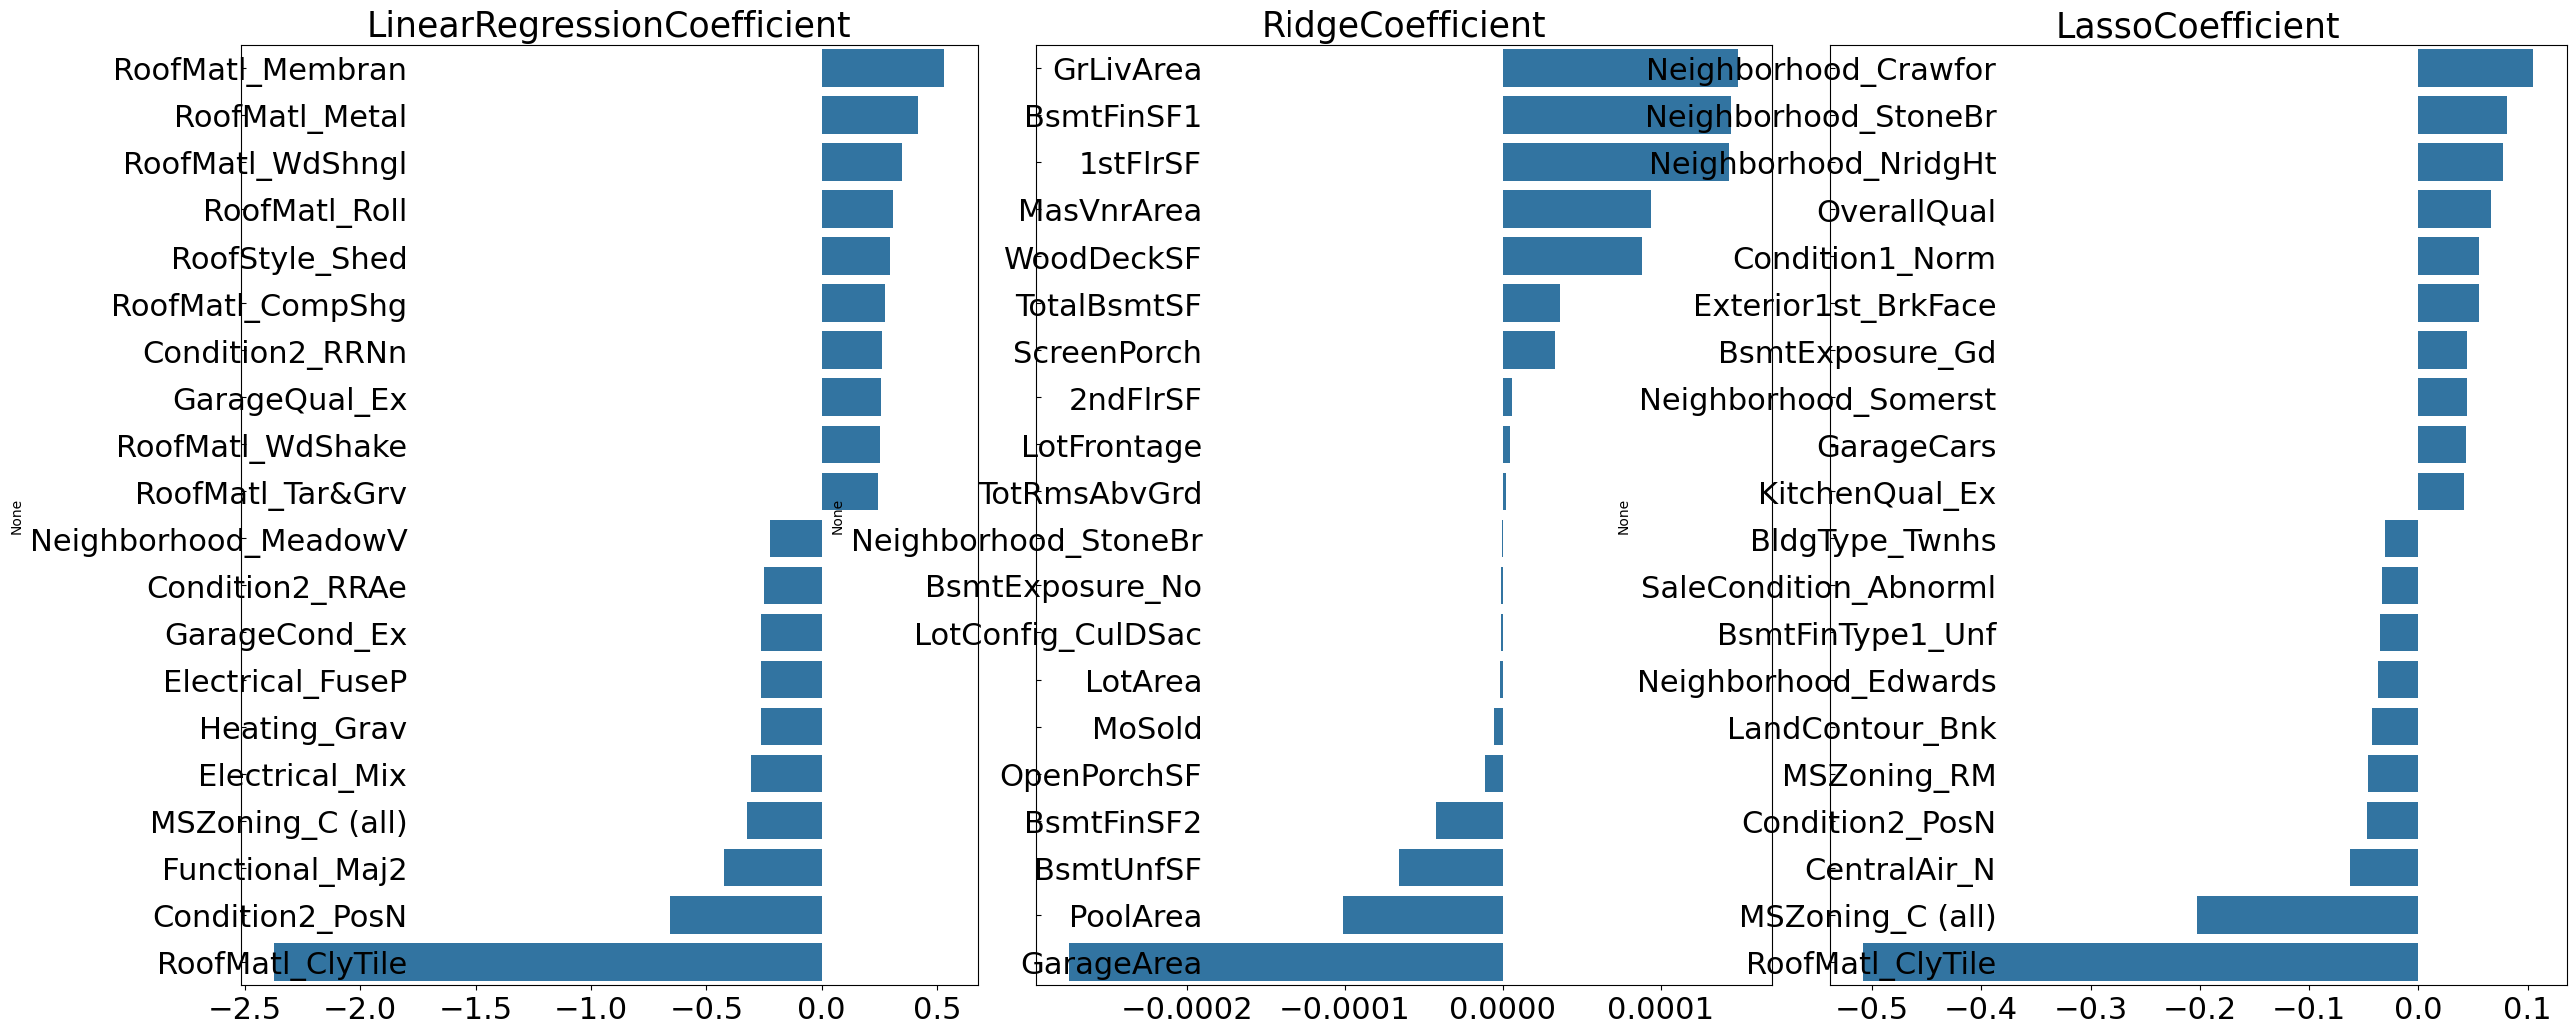

In [94]:
get_rmses(models)
visualize_cofficient(models)